In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


## Loading Necessary libraries

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
# from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

: 

: 

## Reading the dataset 

In [3]:
train_data = pd.read_csv('./data/Corona_NLP_train.csv', encoding='latin_1')
test_data = pd.read_csv("./data/Corona_NLP_test.csv",encoding='latin_1')

In [4]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


## drop duplicate and 'NA' value/s

In [8]:
train_data.drop_duplicates(inplace= True)
test_data.drop_duplicates(inplace=True)

In [9]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

## Making checkpoint 🧐

In [10]:
# copy the dataset into new data
train_df = train_data.copy()
test_df = test_data.copy()

In [11]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


## check if any null value exists? 🤨

In [12]:
print(train_df.isnull().sum())
print("*"*50)
print(test_df.isnull().sum())

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64
**************************************************
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


In [13]:
train_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

## performing small EDA 🤩

In [14]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})

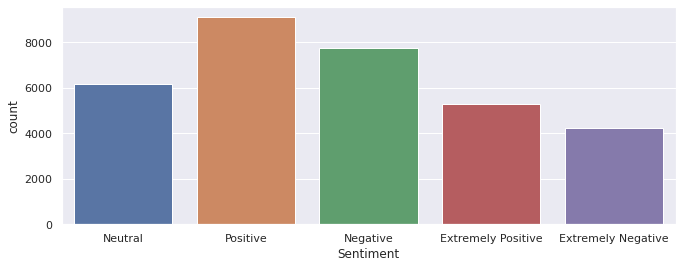

In [15]:
sns.countplot(train_df['Sentiment'])

In [16]:
train_df.shape, test_df.shape

((32567, 6), (2964, 6))

**As we can see we have 5 types of sentiment (but we can make extremely positive into positive and extremely negative into negative )**  😎

In [17]:
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

### Applying the change_sen function/method  😝 

In [18]:
train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x: change_sen(x))
test_df['Sentiment'] = test_df['Sentiment'].apply(lambda x: change_sen(x))

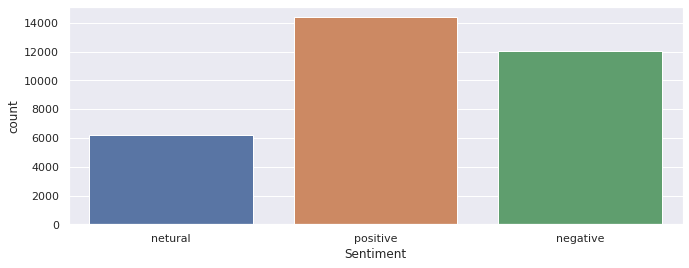

In [19]:
sns.countplot(train_df['Sentiment'])

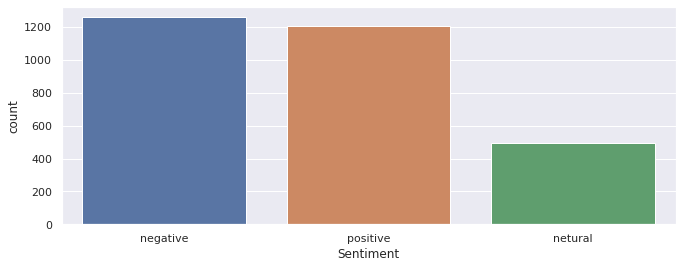

In [20]:
sns.countplot(test_df['Sentiment'])

### Now time for "Data Clearning and processing"  🤯 

In [21]:
# load stop words
stop_word = stopwords.words('english')

In [22]:
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
      
    return text

In [23]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean(x))
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(lambda x: clean(x))

In [24]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,netural
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news regionÂs first confirmed COVID- case ...,positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier grocery store sharing insights To prov...,positive


### We only need "OriginalTweet" and "Sentiment"

 😬 

##### so only taking these columns

In [25]:
df_train = train_df.iloc[:,4:]
df_test = test_df.iloc[:,4:]

In [26]:
df_train.head()

,OriginalTweet,Sentiment
0,,netural
1,advice Talk neighbours family exchange phone n...,positive
2,Coronavirus Australia: Woolworths give elderly...,positive
5,As news regionÂs first confirmed COVID- case ...,positive
6,Cashier grocery store sharing insights To prov...,positive


### now mapping the sentiment  🤠 
- 0: Netural 
- 1: Positive
- 2: Negative

In [27]:
l = {"netural":0, "positive":1,"negative":2}

In [28]:
df_train['Sentiment'] = df_train['Sentiment'].map(l)
df_test['Sentiment']  = df_test['Sentiment'].map(l)

In [29]:
df_train.head()

,OriginalTweet,Sentiment
0,,0
1,advice Talk neighbours family exchange phone n...,1
2,Coronavirus Australia: Woolworths give elderly...,1
5,As news regionÂs first confirmed COVID- case ...,1
6,Cashier grocery store sharing insights To prov...,1


In [30]:
x_train = df_train['OriginalTweet'].copy()
x_test = df_test['OriginalTweet'].copy()

y_train = df_train['Sentiment'].copy()
y_test = df_test['Sentiment'].copy()

In [31]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((32567,), (32567,), (2964,), (2964,))

#### Maxiumn lenght of sequence  😧 

In [32]:
max_len = np.max(x_train.apply(lambda x :len(x)))

In [33]:
max_len

286

### Tokenizer initlization  🤑 

In [34]:
tokenizer = Tokenizer()

In [35]:
tokenizer.fit_on_texts(x_train)
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [36]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 31759
Max sequence length: 286


In [37]:
embedding_dim = 16

## Model Creation  😍 

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 286, 16)           508144    
_________________________________________________________________
bidirectional (Bidirectional (None, 286, 512)          420864    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 962,035
Trainable params: 962,035
Non-trainable params: 0
__________________________________________________

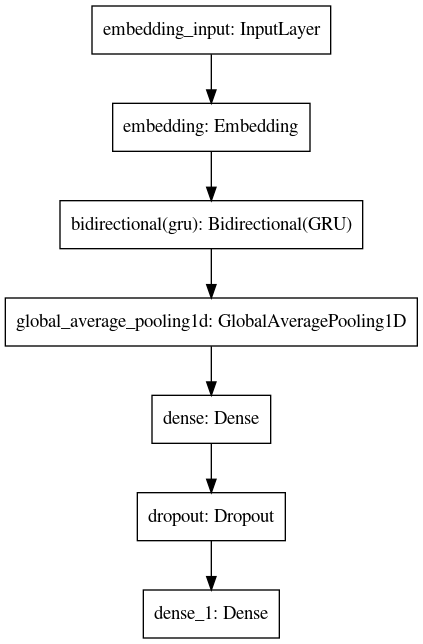

In [40]:
tf.keras.utils.plot_model(model)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32567, 286), (2964, 286), (32567,), (2964,))

In [42]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

## Model training 🥱 😴

In [43]:
num_epochs = 10
history = model.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1018/1018 [==============================] - 43s 43ms/step - loss: 0.9388 - accuracy: 0.5369 - val_loss: 0.7526 - val_accuracy: 0.6775
Epoch 2/10
1018/1018 [==============================] - 43s 42ms/step - loss: 0.5347 - accuracy: 0.8066 - val_loss: 0.4616 - val_accuracy: 0.8327
Epoch 3/10
1018/1018 [==============================] - 43s 43ms/step - loss: 0.3236 - accuracy: 0.8966 - val_loss: 0.4281 - val_accuracy: 0.8539
Epoch 4/10
1018/1018 [==============================] - 43s 42ms/step - loss: 0.2269 - accuracy: 0.9325 - val_loss: 0.4992 - val_accuracy: 0.8428
Epoch 5/10
1018/1018 [==============================] - 43s 42ms/step - loss: 0.1723 - accuracy: 0.9485 - val_loss: 0.5168 - val_accuracy: 0.8465
Epoch 6/10
1018/1018 [==============================] - 43s 43ms/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 0.6223 - val_accuracy: 0.8310
Epoch 7/10
1018/1018 [==============================] - 43s 43ms/step - loss: 0.1067 - accuracy: 0.9672 - val_loss: 0.6263 -

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

## Model Accuracy and loss  😵 

In [45]:
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")


Accuracy on training data is:- 98.04096221923828 %
Loss 6.208620965480804
Accuracy on validation data is:- 79.35222387313843 %
Loss 87.52033114433289


## Plotting  🤪 

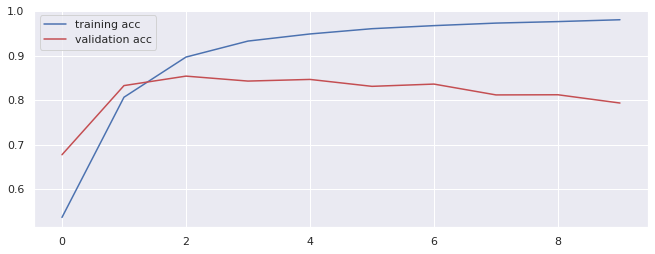

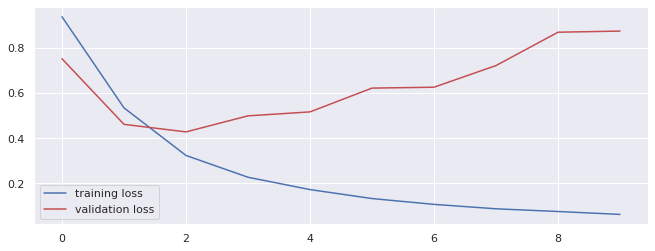

In [46]:
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()


In [47]:
pred = model.predict_classes(x_test)

## Confusion Matrix  🤔 

In [48]:
cm = confusion_matrix(np.argmax(y_test,1),pred)
cm

array([[ 389,   34,   74],
       [ 131,  901,  175],
       [  91,  107, 1062]])

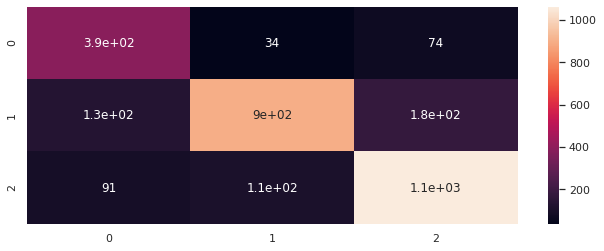

In [49]:
sns.heatmap(cm,annot=True)

## Classification Report  🤫 

In [50]:
print(classification_report(np.argmax(y_test,1),pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       497
           1       0.86      0.75      0.80      1207
           2       0.81      0.84      0.83      1260

    accuracy                           0.79      2964
   macro avg       0.77      0.79      0.78      2964
weighted avg       0.80      0.79      0.80      2964



## if you've learned something from this kernal then please "UPVOTE"  🤭 

## Thanks for Watching!!  🙏 

- Happy Learning 😍 